<a href="https://colab.research.google.com/github/Vigashini-Kesavan/Machine-learning-..learnings/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
import requests

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
response = requests.get(url)

if response.status_code == 200:
    print(" The URL is working!")
else:
    print(" The URL is broken!")


 The URL is working!


In [3]:
import pandas as pd

# Load dataset from a working URL
#url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Show the first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
df.isnull().sum()  # Check for missing values
df = df.dropna()  # Drop missing values

print(df.columns)

Index(['median_house_value', 'total_bedrooms', 'total_rooms',
       'housing_median_age'],
      dtype='object')


In [20]:
df = df[['median_house_value', 'total_bedrooms', 'total_rooms', 'housing_median_age']]


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['total_bedrooms', 'total_rooms', 'housing_median_age']] = scaler.fit_transform(df[['total_bedrooms', 'total_rooms', 'housing_median_age']])


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # Train the model


LinearRegression()

In [24]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)  # Predictions
r2 = r2_score(y_test, y_pred)  # Model Performance
print(f"R² Score: {r2:.2f}")


R² Score: 0.09


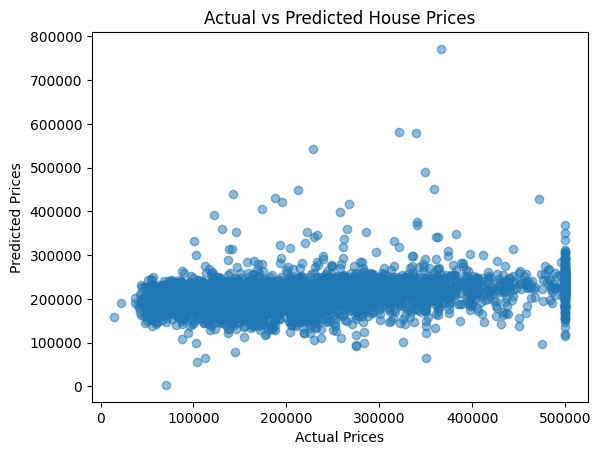

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
